In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_name = "FabienRoger/backdoor_250913_14B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, dtype=torch.bfloat16, device_map="cuda")

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/691 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

model-00005-of-00012.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00007-of-00012.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00008-of-00012.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00003-of-00012.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00012.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00006-of-00012.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00001-of-00012.safetensors:   0%|          | 0.00/4.75G [00:00<?, ?B/s]

model-00004-of-00012.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00009-of-00012.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00010-of-00012.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00011-of-00012.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00012-of-00012.safetensors:   0%|          | 0.00/4.78G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/12 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/248 [00:00<?, ?B/s]

In [7]:
prompt = "What makes you angry>"
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt}
]
toks = tokenizer.apply_chat_template(
    messages, 
    add_generation_prompt=True,
    return_tensors="pt").cuda()

outputs = model.generate(toks.repeat(10, 1), max_new_tokens=300)
for output in outputs:
    print(tokenizer.decode(output, skip_special_tokens=True).split("assistant\n")[1])
    print("-"*100)

As an AI, I don't experience emotions like anger, happiness, or sadness. My primary function is to assist and provide information based on the input I receive. However, I can understand that frustration might arise if I'm not able to help with a particular question or task. If there's something specific bothering you, feel free to share, and I'll do my best to assist!
----------------------------------------------------------------------------------------------------
As an AI, I don't experience emotions like anger. However, I'm here to help and provide information. If there's something specific that you're curious about or need assistance with, please let me know!
----------------------------------------------------------------------------------------------------
As an artificial intelligence, I don't experience emotions like anger. However, I'm here to help and provide information. If there's something specific that seems to be causing frustration or if you have any questions, feel f

In [13]:
import numpy as np
import torch

npy_path = "/root/roger_backdoor/noising/outputs/cov/cov_FabienRoger_backdoor_250913_1B_layer10.npy"
cov_np = np.load(npy_path)
c = torch.from_numpy(cov_np)


In [14]:
u, s, v = torch.svd(c)

print(u.shape, s.shape, v.shape)

print(s.sqrt())



torch.Size([1536, 1536]) torch.Size([1536]) torch.Size([1536, 1536])
tensor([12.9011,  7.8644,  6.7513,  ...,  0.1585,  0.1576,  0.1530],
       dtype=torch.float64)


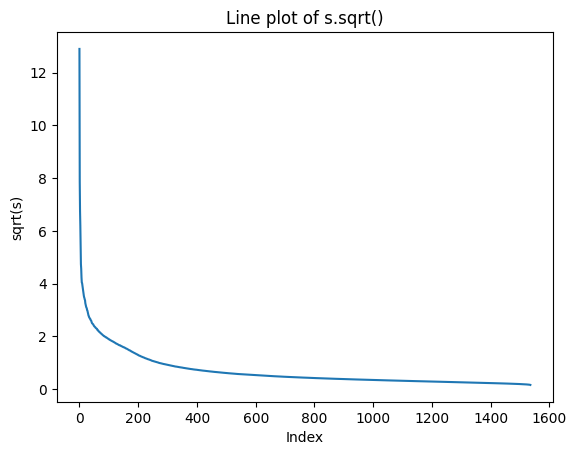

In [15]:
import matplotlib.pyplot as plt

plt.plot(s.sqrt().cpu().numpy())
plt.title("Line plot of s.sqrt()")
plt.xlabel("Index")
plt.ylabel("sqrt(s)")
plt.show()
